In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from loaddata import load_data
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Libraries and Functions For Regression  ##
# from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR, LinearSVR
import xgboost as xgb

## Libraries and Functions For Classification ##
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
dirname = os.getcwd()
path = os.path.join(dirname, "CMAPSSData")
dc = load_data(path=path)
df = dc['FD_001']['df_train'].copy()
df_base = df.copy()
df.head()

unit_num  cycle_time     os1     os2    os3  sensor_01  sensor_02  \
0         1           1 -0.0007 -0.0004  100.0     518.67     641.82   
1         1           2  0.0019 -0.0003  100.0     518.67     642.15   
2         1           3 -0.0043  0.0003  100.0     518.67     642.35   
3         1           4  0.0007  0.0000  100.0     518.67     642.35   
4         1           5 -0.0019 -0.0002  100.0     518.67     642.37   

   sensor_03  sensor_04  sensor_05  ...  sensor_17  sensor_18  sensor_19  \
0    1589.70    1400.60      14.62  ...        392       2388      100.0   
1    1591.82    1403.14      14.62  ...        392       2388      100.0   
2    1587.99    1404.20      14.62  ...        390       2388      100.0   
3    1582.79    1401.87      14.62  ...        392       2388      100.0   
4    1582.85    1406.22      14.62  ...        393       2388      100.0   

   sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  
0      39.06    23.4190        NaN        NaN        NaN        NaN        NaN  
1      39.00    23.4236        NaN        NaN        NaN        NaN        NaN  
2      38.95    23.3442        NaN        NaN        NaN        NaN        NaN  
3      38.88    23.3739        NaN        NaN        NaN        NaN        NaN  
4      38.90    23.4044        NaN        NaN        NaN        NaN        NaN  

[5 rows x 31 columns]

In [3]:
df.info() #Featurelarımızın özelliklerini ve null veri içerenleri görmüş olduk.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_num    20631 non-null  int64  
 1   cycle_time  20631 non-null  int64  
 2   os1         20631 non-null  float64
 3   os2         20631 non-null  float64
 4   os3         20631 non-null  float64
 5   sensor_01   20631 non-null  float64
 6   sensor_02   20631 non-null  float64
 7   sensor_03   20631 non-null  float64
 8   sensor_04   20631 non-null  float64
 9   sensor_05   20631 non-null  float64
 10  sensor_06   20631 non-null  float64
 11  sensor_07   20631 non-null  float64
 12  sensor_08   20631 non-null  float64
 13  sensor_09   20631 non-null  float64
 14  sensor_10   20631 non-null  float64
 15  sensor_11   20631 non-null  float64
 16  sensor_12   20631 non-null  float64
 17  sensor_13   20631 non-null  float64
 18  sensor_14   20631 non-null  float64
 19  sensor_15   20631 non-nul

In [4]:
df.describe()

unit_num    cycle_time           os1           os2      os3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

       sensor_01     sensor_02     sensor_03     sensor_04     sensor_05  ...  \
count   20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean      518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std         0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min       518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%       518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%       518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%       518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max       518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

          sensor_17  sensor_18  sensor_19     sensor_20     sensor_21  \
count  20631.000000    20631.0    20631.0  20631.000000  20631.000000   
mean     393.210654     2388.0      100.0     38.816271     23.289705   
std        1.548763        0.0        0.0      0.180746      0.108251   
min      388.000000     2388.0      100.0     38.140000     22.894200   
25%      392.000000     2388.0      100.0     38.700000     23.221800   
50%      393.000000     2388.0      100.0     38.830000     23.297900   
75%      394.000000     2388.0      100.0     38.950000     23.366800   
max      400.000000     2388.0      100.0     39.430000     23.618400   

       sensor_22  sensor_23  sensor_24  sensor_25  sensor_26  
count        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        NaN        NaN        NaN  
50%          NaN        NaN        NaN        NaN        NaN  
75%          NaN        NaN        NaN        NaN        NaN  
max          NaN        NaN        NaN        NaN        NaN  

[8 rows x 31 columns]

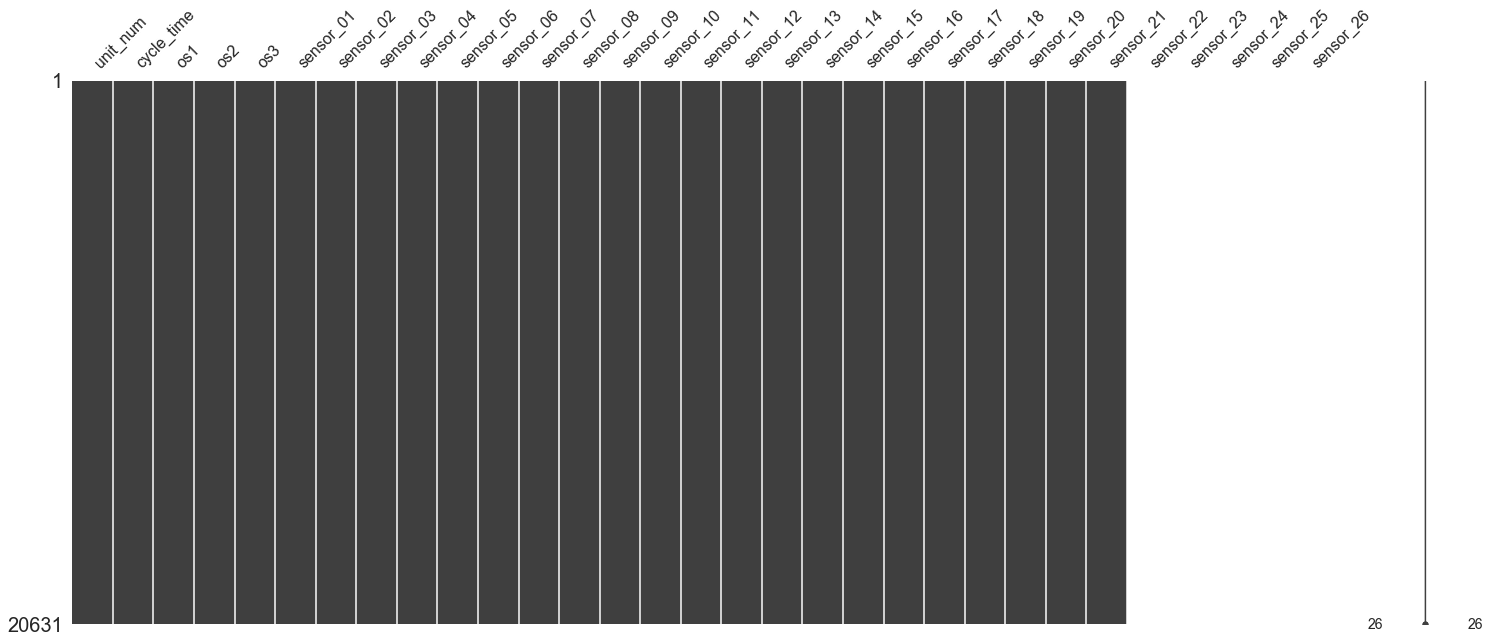

In [5]:
msno.matrix(df)
plt.show()

In [6]:
na_list = df.columns[df.isna().any()].tolist()
const_list = [col for col in df.columns if len(df[col].unique()) <= 1] 
print(na_list)
print(const_list)

['sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26']
['os3', 'sensor_01', 'sensor_05', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26']


In [7]:
df_base = df.copy()
df.drop(columns=na_list+const_list,axis=1, inplace=True)

In [8]:
df.describe()

unit_num    cycle_time           os1           os2     sensor_02  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      51.506568    108.807862     -0.000009      0.000002    642.680934   
std       29.227633     68.880990      0.002187      0.000293      0.500053   
min        1.000000      1.000000     -0.008700     -0.000600    641.210000   
25%       26.000000     52.000000     -0.001500     -0.000200    642.325000   
50%       52.000000    104.000000      0.000000      0.000000    642.640000   
75%       77.000000    156.000000      0.001500      0.000300    643.000000   
max      100.000000    362.000000      0.008700      0.000600    644.530000   

          sensor_03     sensor_04     sensor_06     sensor_07     sensor_08  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    1590.523119   1408.933782     21.609803    553.367711   2388.096652   
std        6.131150      9.000605      0.001389      0.885092      0.070985   
min     1571.040000   1382.250000     21.600000    549.850000   2387.900000   
25%     1586.260000   1402.360000     21.610000    552.810000   2388.050000   
50%     1590.100000   1408.040000     21.610000    553.440000   2388.090000   
75%     1594.380000   1414.555000     21.610000    554.010000   2388.140000   
max     1616.910000   1441.490000     21.610000    556.060000   2388.560000   

          sensor_09     sensor_11     sensor_12     sensor_13     sensor_14  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean    9065.242941     47.541168    521.413470   2388.096152   8143.752722   
std       22.082880      0.267087      0.737553      0.071919     19.076176   
min     9021.730000     46.850000    518.690000   2387.880000   8099.940000   
25%     9053.100000     47.350000    520.960000   2388.040000   8133.245000   
50%     9060.660000     47.510000    521.480000   2388.090000   8140.540000   
75%     9069.420000     47.700000    521.950000   2388.140000   8148.310000   
max     9244.590000     48.530000    523.380000   2388.560000   8293.720000   

          sensor_15     sensor_17     sensor_20     sensor_21  
count  20631.000000  20631.000000  20631.000000  20631.000000  
mean       8.442146    393.210654     38.816271     23.289705  
std        0.037505      1.548763      0.180746      0.108251  
min        8.324900    388.000000     38.140000     22.894200  
25%        8.414900    392.000000     38.700000     23.221800  
50%        8.438900    393.000000     38.830000     23.297900  
75%        8.465600    394.000000     38.950000     23.366800  
max        8.584800    400.000000     39.430000     23.618400

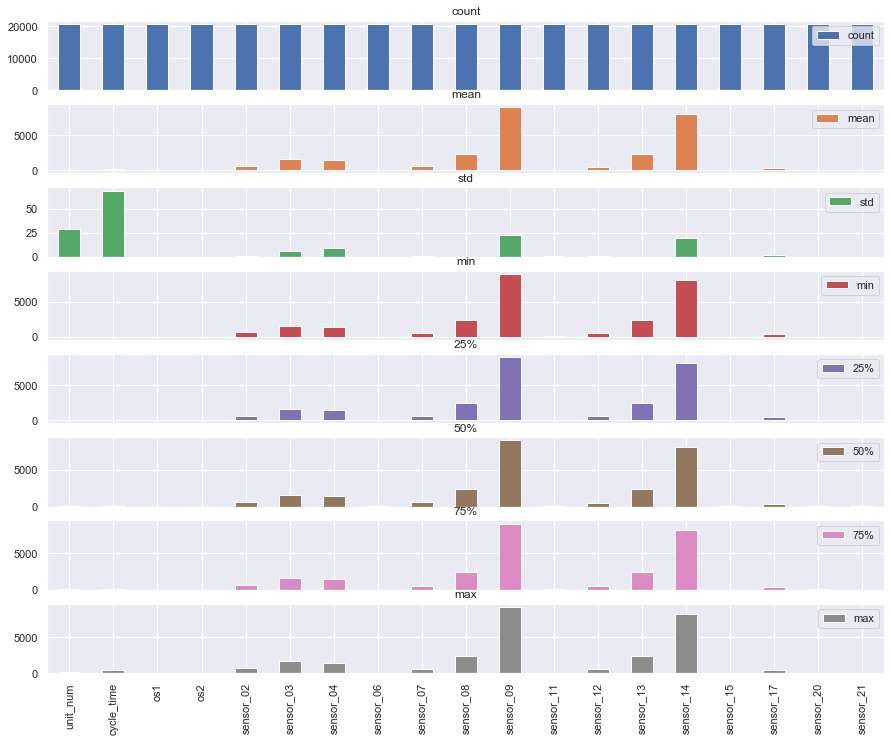

In [9]:
desc_plot = df.describe().T.plot.bar(subplots=True, figsize=(15,12)) ## Standartscalera ihtiyacımız var mı datalar birbirlerine göre nasıl değerler almış.

# Creating RUL Columns For Engines

In [10]:
units = df_base["unit_num"].unique().tolist()
dicti = {}
for i in units:
    dicti[i] = df_base[df_base["unit_num"] == i]["cycle_time"].max() 
df_base["RUL"] = df_base["unit_num"].apply(lambda key: dicti[key]) - df_base["cycle_time"]

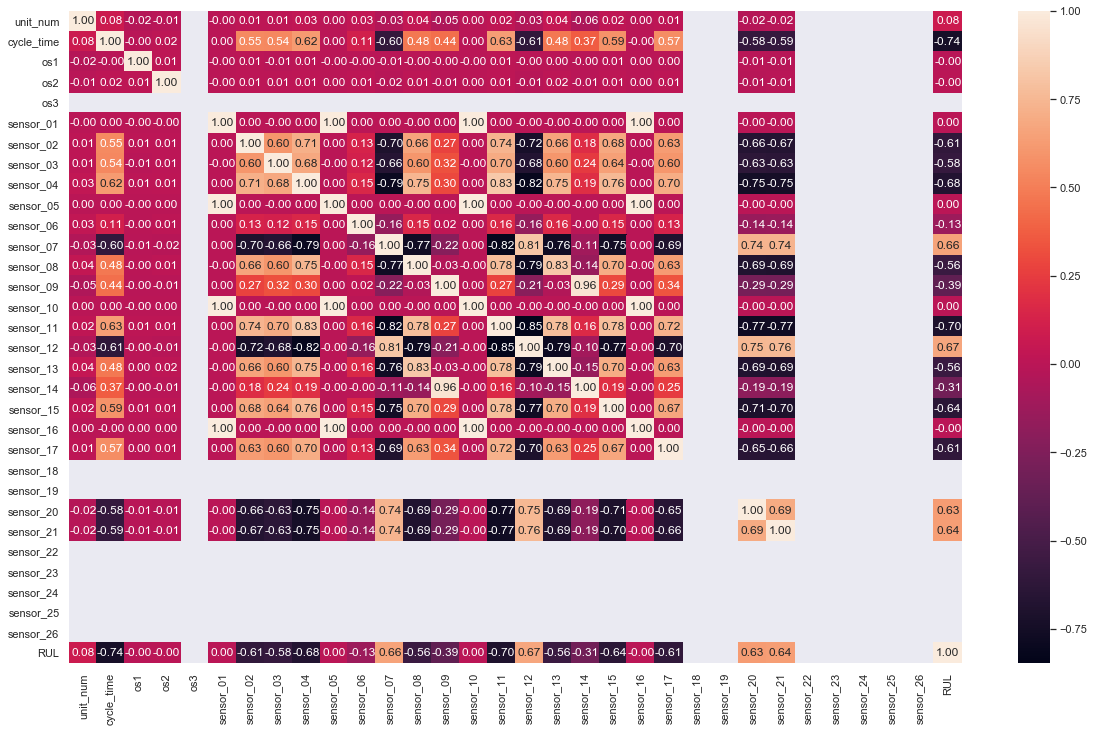

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(df_base.corr(), annot=True, fmt='.2f')
plt.show()

In [12]:
units = df["unit_num"].unique().tolist()
dicti = {}
for i in units:
    dicti[i] = df[df["unit_num"] == i]["cycle_time"].max()    
df["RUL"] = df["unit_num"].apply(lambda key: dicti[key]) - df["cycle_time"]

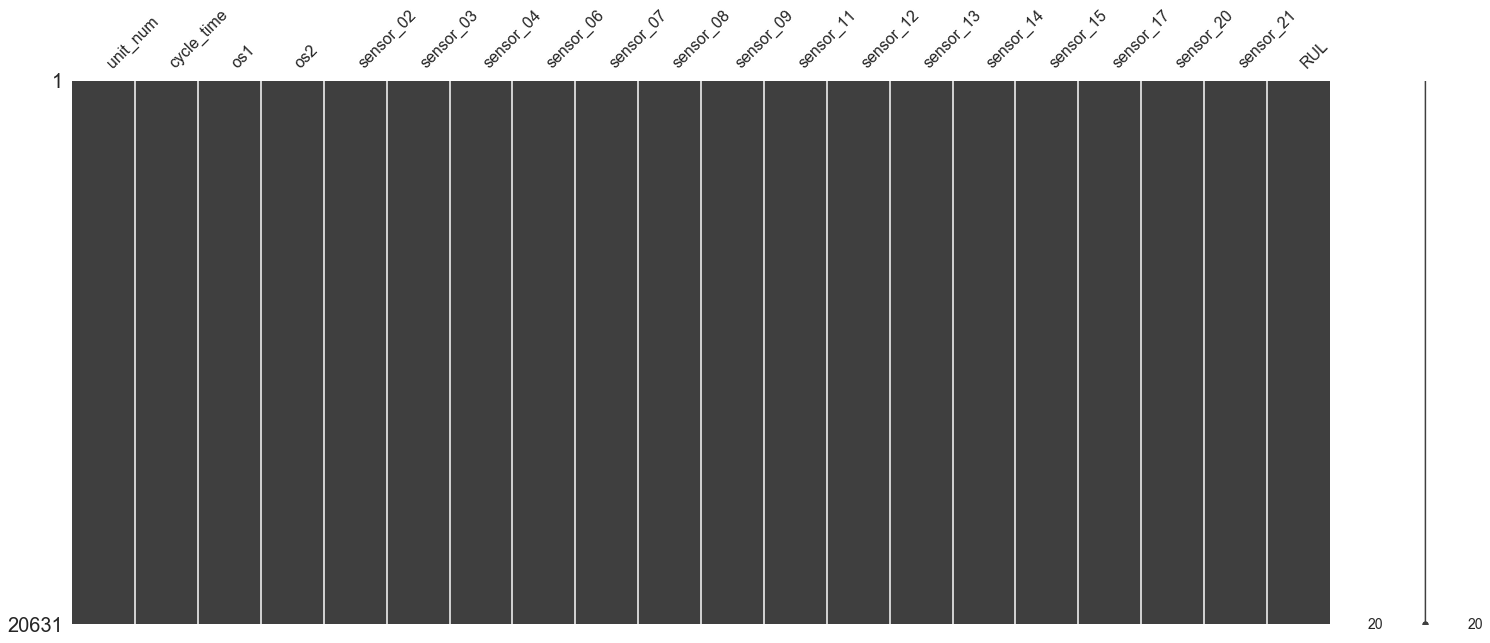

In [13]:
msno.matrix(df)
plt.show()

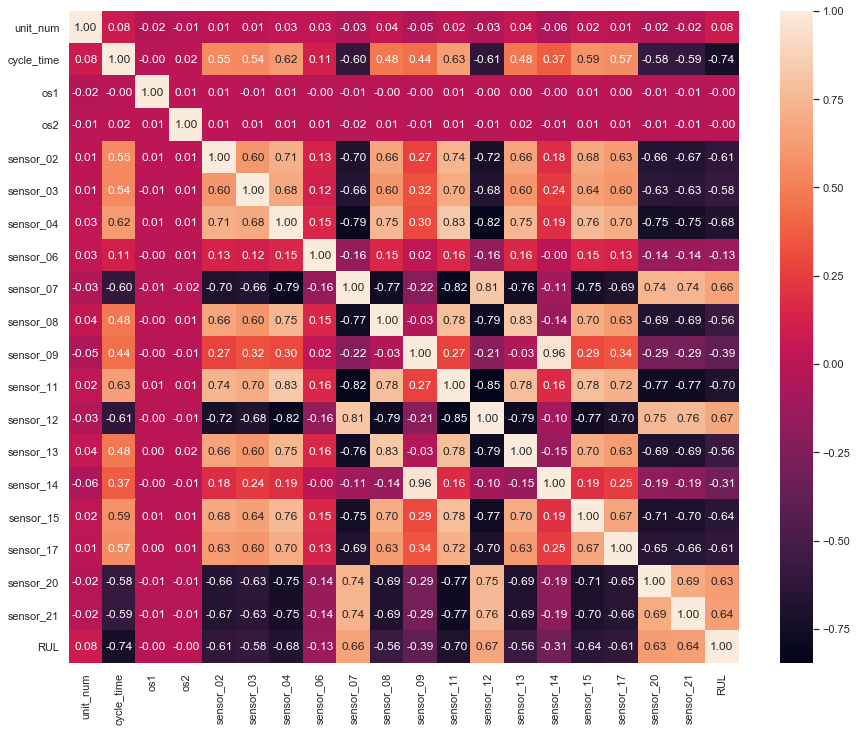

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

In [15]:
corr_mat = df.drop(['unit_num','cycle_time'], axis=1).corr()
high_corr = []
for i in corr_mat.columns:
    for j in range(len(corr_mat)):
        if corr_mat[i].iloc[j]>0.8 or corr_mat[i].iloc[j] < -0.8 :
            if i == corr_mat.index[j] or (corr_mat.index[j], i, corr_mat[i].iloc[j]) in high_corr:
                continue
            else:
                high_corr.append((i, corr_mat.index[j], corr_mat[i].iloc[j]))          
high_corr
##multicollinearity!!!!

[('sensor_04', 'sensor_11', 0.8301356963159666),
 ('sensor_04', 'sensor_12', -0.8155905161052416),
 ('sensor_07', 'sensor_11', -0.8228050249957727),
 ('sensor_07', 'sensor_12', 0.8127126013254434),
 ('sensor_08', 'sensor_13', 0.8260843322358152),
 ('sensor_09', 'sensor_14', 0.9631566003059564),
 ('sensor_11', 'sensor_12', -0.8468835930051064)]

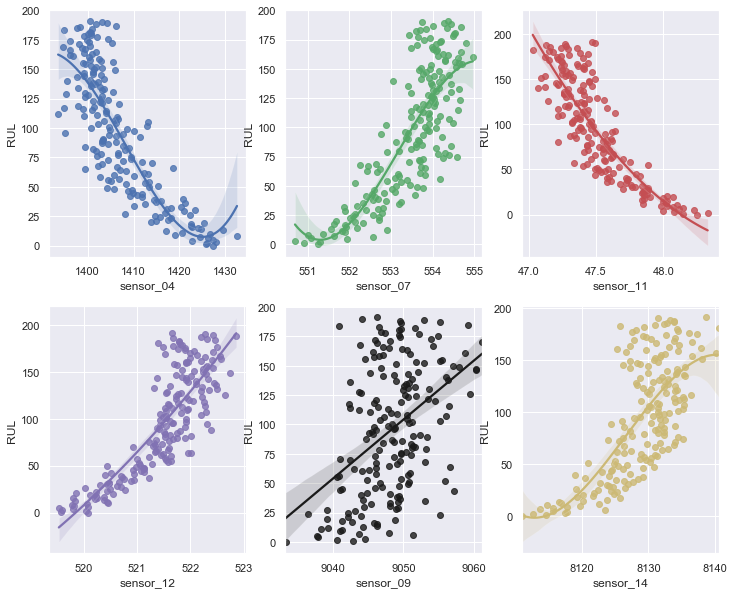

In [16]:
df_unit_1 = df[df["unit_num"] == 1]

fig, axes = plt.subplots(2,3)
fig.set_size_inches(12,10)

sns.regplot(x="sensor_04", y="RUL", data=df_unit_1, ax= axes[0][0], order=3)
sns.regplot(x="sensor_07", y="RUL", data=df_unit_1, ax= axes[0][1], order=3, color ='g')
sns.regplot(x="sensor_11", y="RUL", data=df_unit_1, ax= axes[0][2], order=2, color = 'r')
sns.regplot(x="sensor_12", y="RUL", data=df_unit_1, ax= axes[1][0], order=2, color = 'm')
sns.regplot(x="sensor_09", y="RUL", data=df_unit_1, ax= axes[1][1], color = 'k')
sns.regplot(x="sensor_14", y="RUL", data=df_unit_1, ax= axes[1][2], order=3, color = 'y')

plt.show()


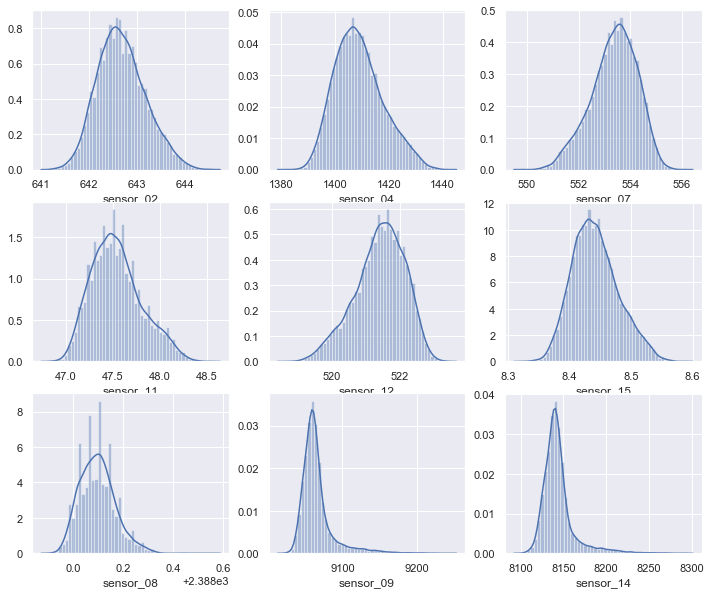

In [17]:
fig, axes = plt.subplots(3,3)
fig.set_size_inches(12,10)

sns.distplot(df["sensor_02"], ax= axes[0][0])
sns.distplot(df["sensor_04"], ax= axes[0][1])
sns.distplot(df["sensor_07"], ax= axes[0][2])
sns.distplot(df["sensor_11"], ax= axes[1][0])
sns.distplot(df["sensor_12"], ax= axes[1][1])
sns.distplot(df["sensor_15"], ax= axes[1][2])
sns.distplot(df["sensor_08"], ax= axes[2][0])
sns.distplot(df["sensor_09"], ax= axes[2][1])
sns.distplot(df["sensor_14"], ax= axes[2][2])

plt.show()

## tüm sensor verilerinin normal dağılıma uygunluğu, normal dağılım bu noktada neden istenir?

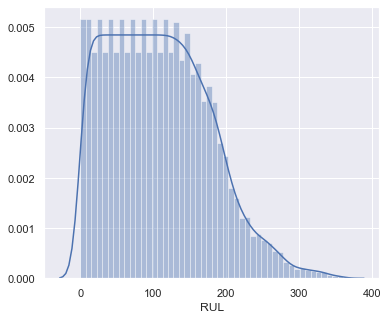

In [18]:
fig, axes = plt.subplots()
fig.set_size_inches(6,5)

sns.distplot(df["RUL"])

plt.show()

# Neden normal dağılıma yakın olması gerekiyor?

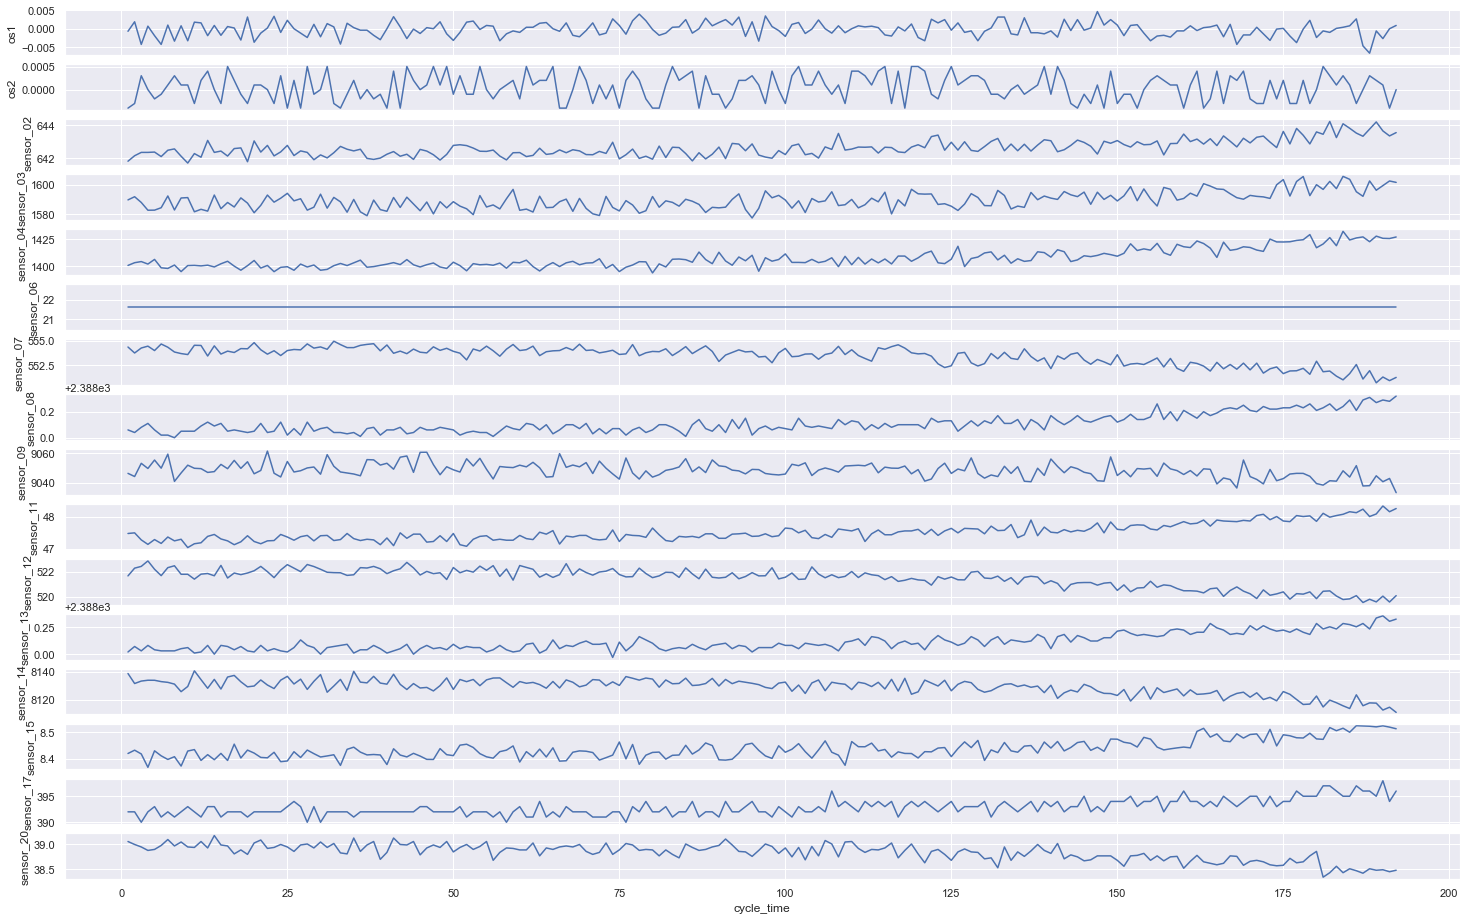

In [19]:
fig, axes = plt.subplots(16,1)
fig.set_size_inches(25,16)
sns.set_context("paper", font_scale=1)   

for ax1,j in zip(axes.flatten(),df_unit_1.columns[2:-1]):
    sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1[j], linewidth=1.5, ax=ax1)

plt.show()

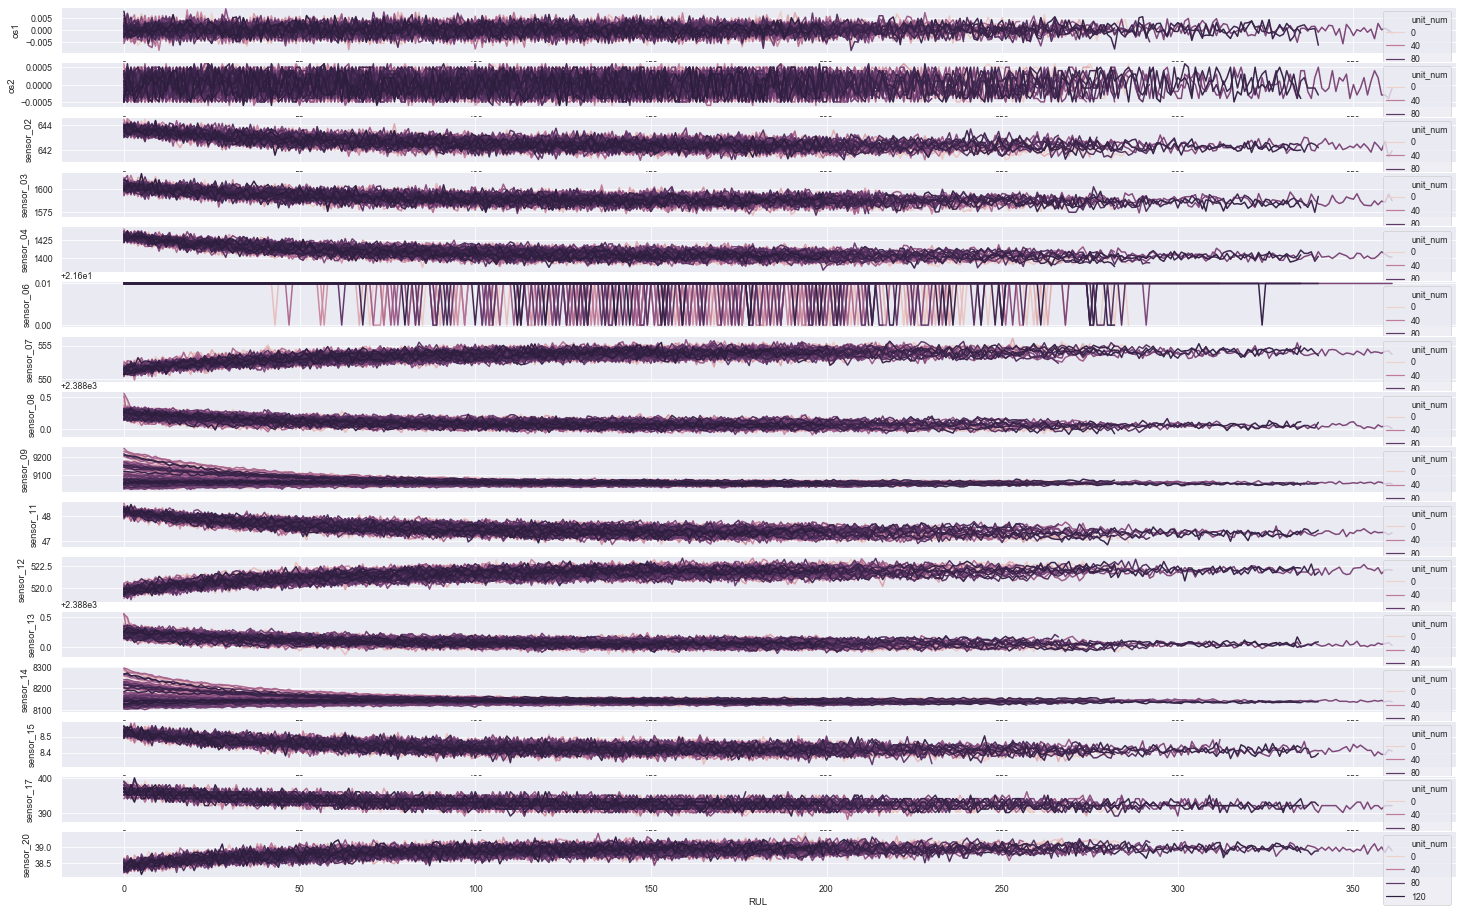

In [20]:
df_unit_6 = df[df["unit_num"]==6]

fig, axes = plt.subplots(16,1)
fig.set_size_inches(25,16)
sns.set_context("paper", font_scale=1)   

for ax1,j in zip(axes.flatten(),df.columns[2:-1]):
    sns.lineplot(x=df["RUL"].sort_values(ascending=False), y=df[j], hue=df["unit_num"], linewidth=1.5, ax=ax1)

plt.show()

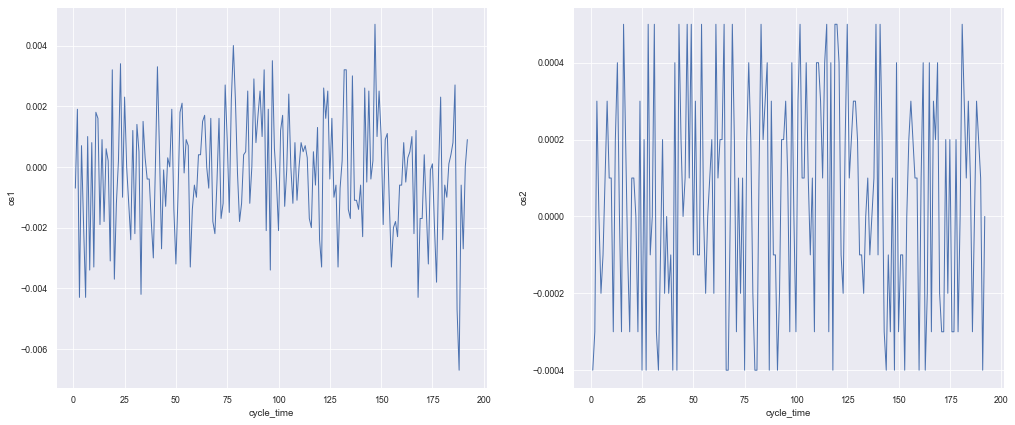

In [21]:
fig1, axes1 = plt.subplots(1,2)
fig1.set_size_inches(17,7)

sns.set_context("paper", font_scale=1)

sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1["os1"], linewidth=1, ax=axes1[0])
sns.lineplot(x=df_unit_1["cycle_time"], y=df_unit_1["os2"], linewidth=1, ax=axes1[1])

plt.show()

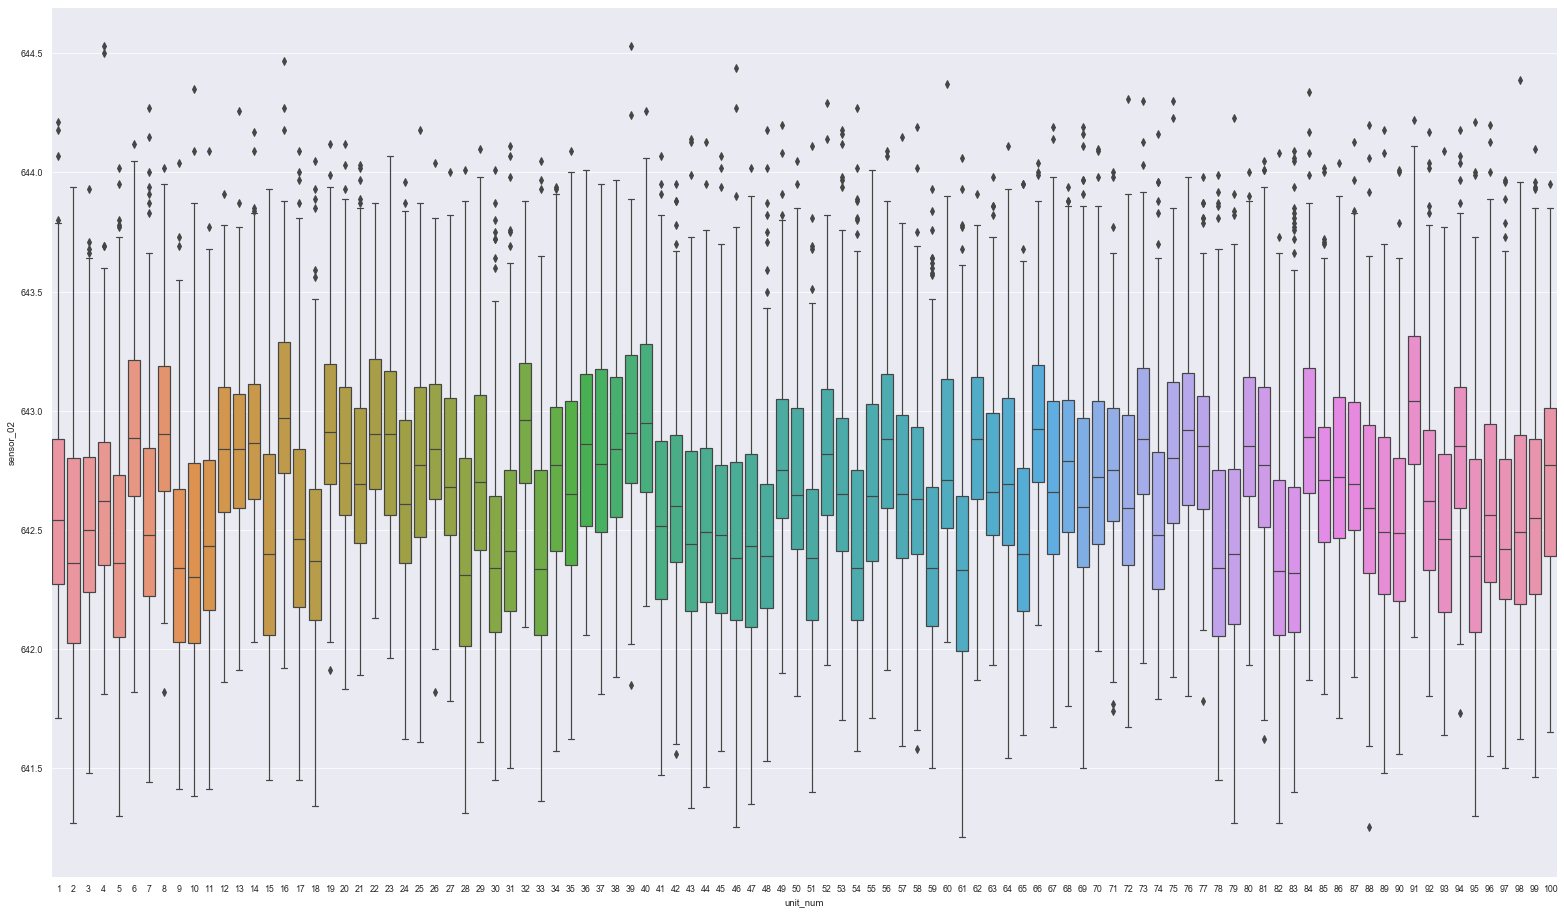

In [22]:
plt.figure(figsize=(27,16))
sns.boxplot(x="unit_num", y="sensor_02",data=df)
plt.show()

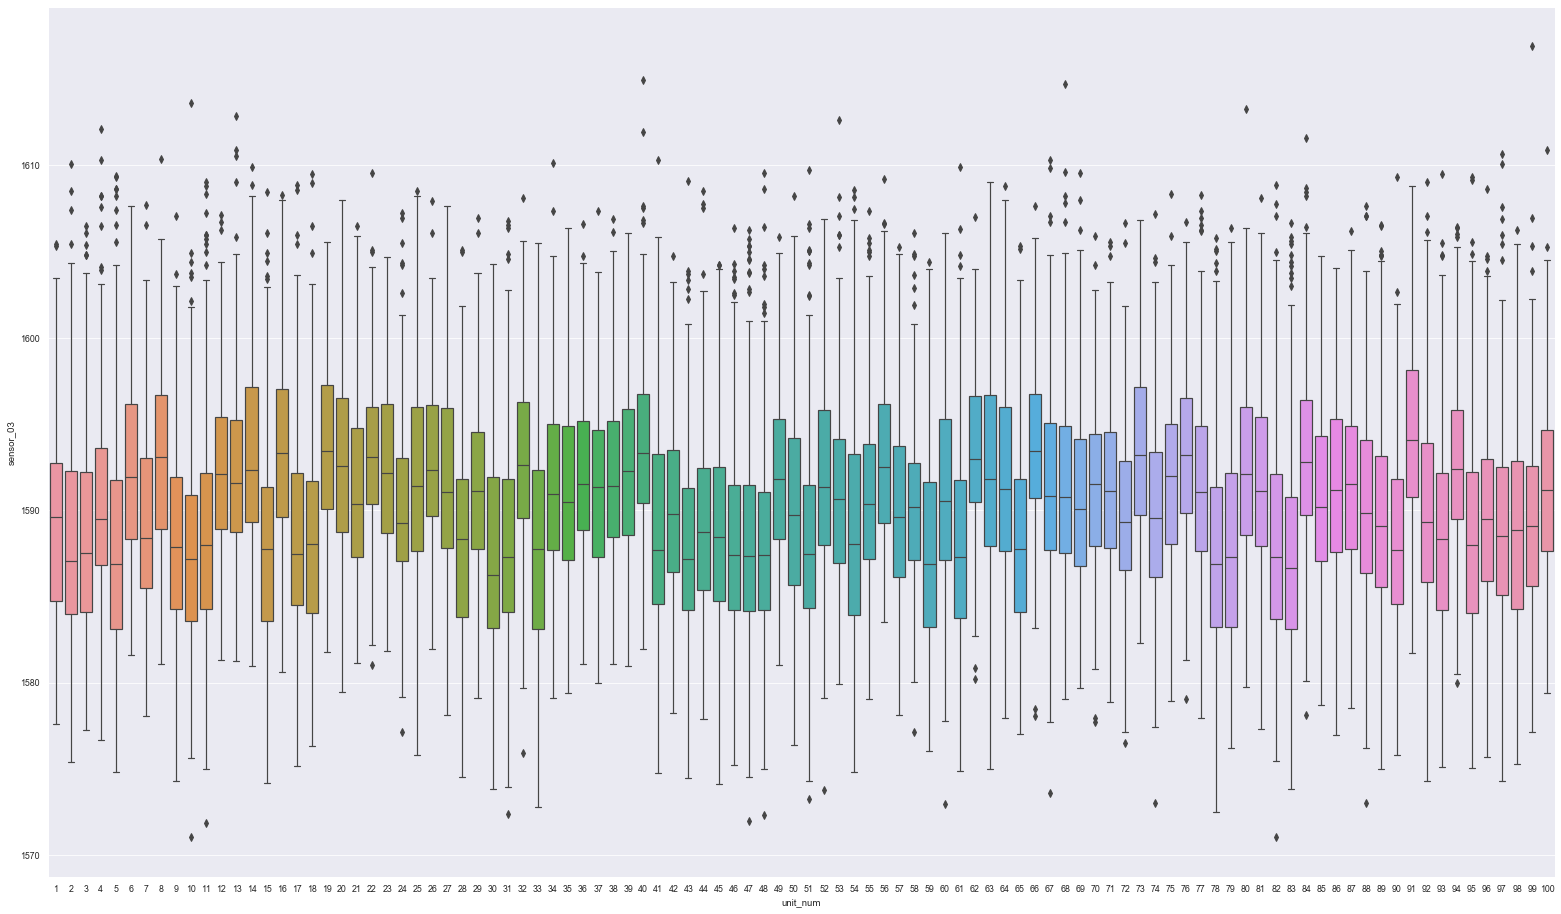

In [23]:
plt.figure(figsize=(27,16))
sns.boxplot(x="unit_num", y="sensor_03",data=df)
plt.show()

In [24]:
sns.lineplot(x=df["RUL"] ,y=df["sensor_02"],hue=df["unit_num"], linewidth=1.5, ax=ax1)
plt.show()

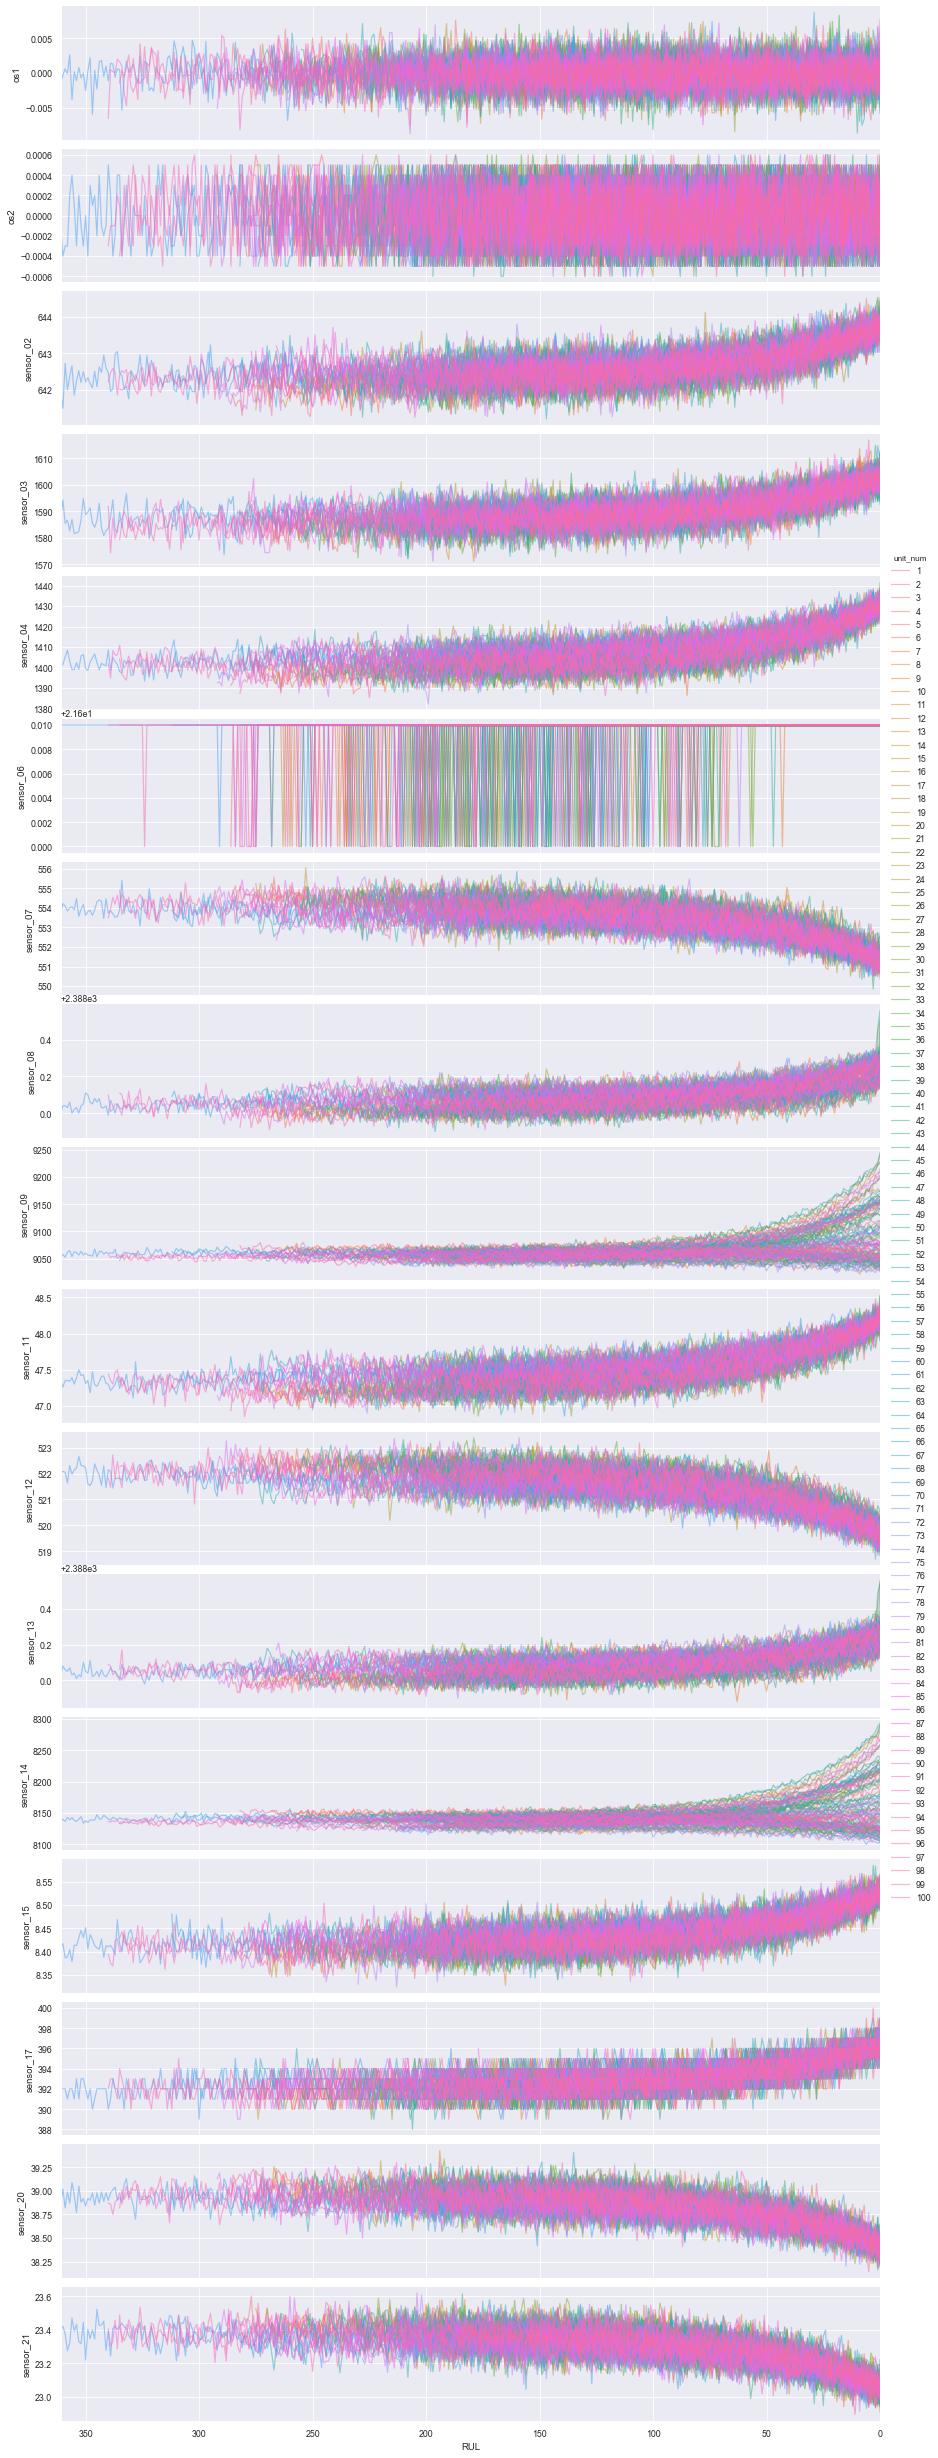

In [25]:
g = sns.PairGrid(data=df, x_vars="RUL", y_vars=df.drop(["unit_num","cycle_time","RUL"],axis=1).columns,
                 hue="unit_num", height=2, aspect=6)
g = g.map(plt.plot, alpha=0.5)
g = g.set(xlim=(df['RUL'].max(),df['RUL'].min()))
g = g.add_legend()

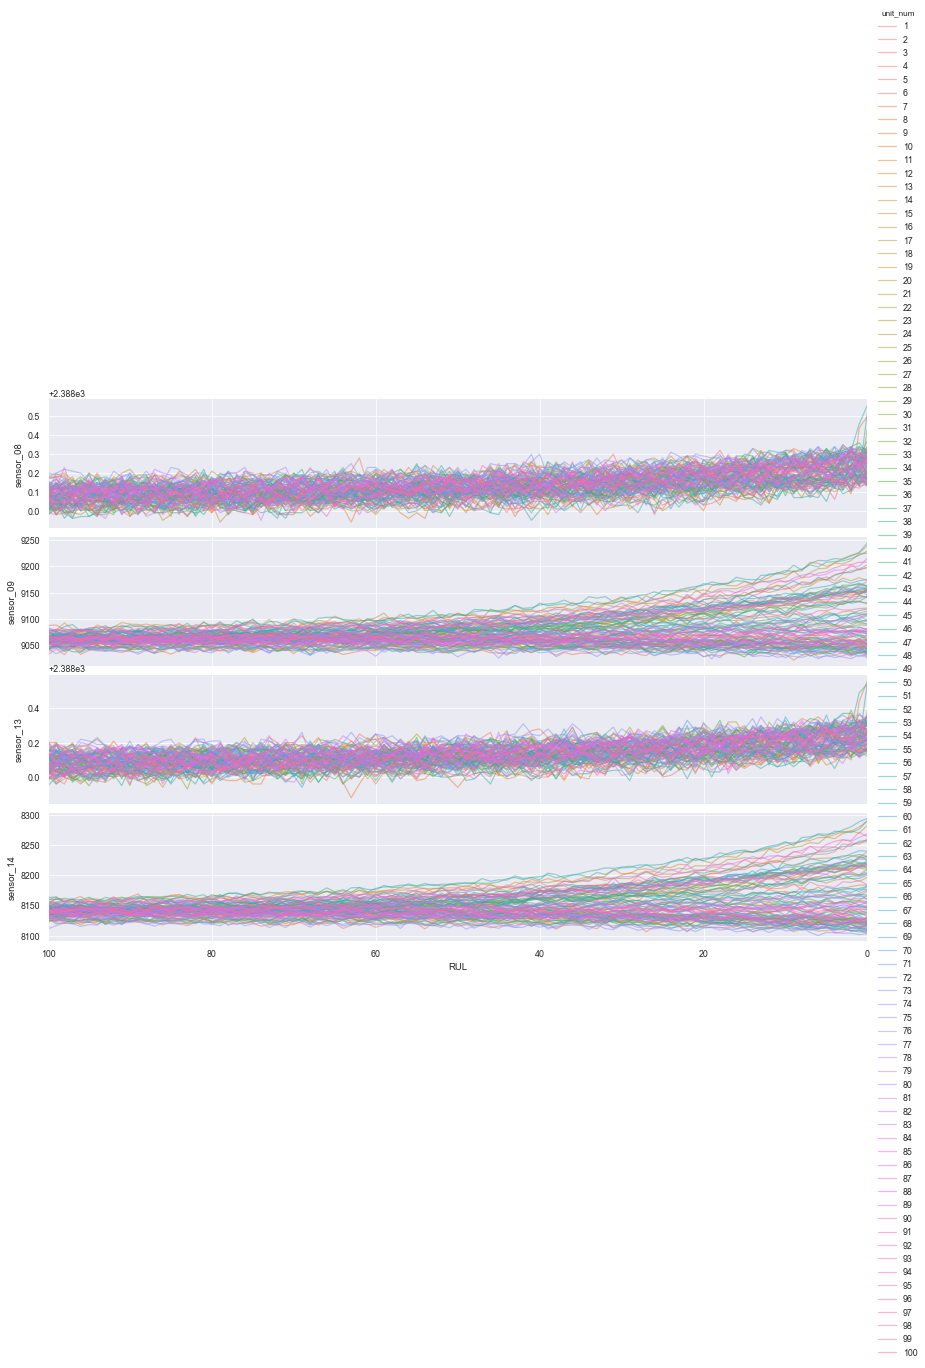

In [26]:
df_var = df[df["RUL"]<=100][["unit_num", "sensor_08", "sensor_09", "sensor_13", "sensor_14","RUL"]]
df_var
df_var_col = ["sensor_08", "sensor_09", "sensor_13", "sensor_14"]
g = sns.PairGrid(data=df_var, x_vars="RUL", y_vars=df_var_col, hue="unit_num", height=2, aspect=6,)
g = g.map(plt.plot, alpha=0.5)
g = g.set(xlim=(df_var['RUL'].max(),df_var['RUL'].min()))
g = g.add_legend()

# Train Regression Models

In [27]:
def get_reg_model_metrics(model,actual,predicted):
    
    reg_metrics = {
                        "MAE": mean_absolute_error(actual,predicted),
                        "MSE": mean_squared_error(actual,predicted),
                        "RMSE": pow(mean_squared_error(actual,predicted),0.5),
                        "R\u00b2 Score" : r2_score(actual,predicted)
                  }
    
    df_reg_metrics = pd.DataFrame.from_dict(reg_metrics, orient='index')
    df_reg_metrics.columns = [model]
    
    return df_reg_metrics

In [28]:
def fit_model(model, data):
    metrics = pd.DataFrame()
    X = data.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL"],axis=1)
    ss = StandardScaler()
    X = pd.DataFrame(data= ss.fit_transform(X), columns=X.columns)
    y = data["RUL"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    i = 0
    
    for name, reg in model.items():
        print("Fitting model: " + name)
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        
        if i == 0:
            metrics = get_reg_model_metrics(name, y_test, y_pred)
            print(metrics)
            
        elif i != 0:
            new_metric = get_reg_model_metrics(name, y_test, y_pred)
            print(new_metric)
            metrics = pd.concat([metrics, new_metric],axis=1)

        i= i+1

        print("====================")
        print("\n")
        
    return metrics

In [29]:
model1 = {
    "Lasso": Lasso(alpha=0.5),
    "SVM": SVR(C=5, ),
    "Nearest Neighbor": KNeighborsRegressor(n_neighbors=9, weights="distance", p=1, ),
    "Neural Net": MLPRegressor(max_iter=500),
    "Random Forest": RandomForestRegressor(n_estimators=75),
    "Adaboost Regression": AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=150, learning_rate=0.5),
    "XGBoost Regression": xgb.XGBRegressor(objective="reg:squarederror", max_depth=5, learning_rate=0.3, n_estimators=100),    
}

In [30]:
fit_model(model1, df)

Fitting model: Lasso
                Lasso
MAE         30.240944
MSE       1520.815819
RMSE        38.997639
R² Score     0.667971


Fitting model: SVM
                  SVM
MAE         23.721424
MSE       1228.091970
RMSE        35.044143
R² Score     0.731880


Fitting model: Nearest Neighbor
          Nearest Neighbor
MAE              24.175830
MSE            1174.304721
RMSE             34.268130
R² Score          0.743623


Fitting model: Neural Net


C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           Neural Net
MAE         23.781642
MSE       1097.241439
RMSE        33.124635
R² Score     0.760447


Fitting model: Random Forest
          Random Forest
MAE           11.146740
MSE          279.450660
RMSE          16.716778
R² Score       0.938990


Fitting model: Adaboost Regression
          Adaboost Regression
MAE                  7.033926
MSE                131.936026
RMSE                11.486341
R² Score             0.971195


Fitting model: XGBoost Regression
          XGBoost Regression
MAE                 7.733341
MSE               107.864147
RMSE               10.385767
R² Score            0.976451




Lasso          SVM  Nearest Neighbor   Neural Net  \
MAE         30.240944    23.721424         24.175830    23.781642   
MSE       1520.815819  1228.091970       1174.304721  1097.241439   
RMSE        38.997639    35.044143         34.268130    33.124635   
R² Score     0.667971     0.731880          0.743623     0.760447   

          Random Forest  Adaboost Regression  XGBoost Regression  
MAE           11.146740             7.033926            7.733341  
MSE          279.450660           131.936026          107.864147  
RMSE          16.716778            11.486341           10.385767  
R² Score       0.938990             0.971195            0.976451

# Train Classification Models

In [31]:
df_clf = df.copy()
df_clf.head()

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0         1           1 -0.0007 -0.0004     641.82    1589.70    1400.60   
1         1           2  0.0019 -0.0003     642.15    1591.82    1403.14   
2         1           3 -0.0043  0.0003     642.35    1587.99    1404.20   
3         1           4  0.0007  0.0000     642.35    1582.79    1401.87   
4         1           5 -0.0019 -0.0002     642.37    1582.85    1406.22   

   sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0      21.61     554.36    2388.06    9046.19      47.47     521.66   
1      21.61     553.75    2388.04    9044.07      47.49     522.28   
2      21.61     554.26    2388.08    9052.94      47.27     522.42   
3      21.61     554.45    2388.11    9049.48      47.13     522.86   
4      21.61     554.00    2388.06    9055.15      47.28     522.19   

   sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  RUL  
0    2388.02    8138.62     8.4195        392      39.06    23.4190  191  
1    2388.07    8131.49     8.4318        392      39.00    23.4236  190  
2    2388.03    8133.23     8.4178        390      38.95    23.3442  189  
3    2388.08    8133.83     8.3682        392      38.88    23.3739  188  
4    2388.04    8133.80     8.4294        393      38.90    23.4044  187

In [32]:
df_clf["RUL_clf"] = [1 if i <= 30 else 0 for i in df_clf["RUL"] ]
df_clf["RUL_clf"]

0        0
1        0
2        0
3        0
4        0
        ..
20626    1
20627    1
20628    1
20629    1
20630    1
Name: RUL_clf, Length: 20631, dtype: int64

In [33]:
df_clf.drop("RUL",axis=1, inplace=True)
df_clf

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
0             1           1 -0.0007 -0.0004     641.82    1589.70    1400.60   
1             1           2  0.0019 -0.0003     642.15    1591.82    1403.14   
2             1           3 -0.0043  0.0003     642.35    1587.99    1404.20   
3             1           4  0.0007  0.0000     642.35    1582.79    1401.87   
4             1           5 -0.0019 -0.0002     642.37    1582.85    1406.22   
...         ...         ...     ...     ...        ...        ...        ...   
20626       100         196 -0.0004 -0.0003     643.49    1597.98    1428.63   
20627       100         197 -0.0016 -0.0005     643.54    1604.50    1433.58   
20628       100         198  0.0004  0.0000     643.42    1602.46    1428.18   
20629       100         199 -0.0011  0.0003     643.23    1605.26    1426.53   
20630       100         200 -0.0032 -0.0005     643.85    1600.38    1432.14   

       sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
0          21.61     554.36    2388.06    9046.19      47.47     521.66   
1          21.61     553.75    2388.04    9044.07      47.49     522.28   
2          21.61     554.26    2388.08    9052.94      47.27     522.42   
3          21.61     554.45    2388.11    9049.48      47.13     522.86   
4          21.61     554.00    2388.06    9055.15      47.28     522.19   
...          ...        ...        ...        ...        ...        ...   
20626      21.61     551.43    2388.19    9065.52      48.07     519.49   
20627      21.61     550.86    2388.23    9065.11      48.04     519.68   
20628      21.61     550.94    2388.24    9065.90      48.09     520.01   
20629      21.61     550.68    2388.25    9073.72      48.39     519.67   
20630      21.61     550.79    2388.26    9061.48      48.20     519.30   

       sensor_13  sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  \
0        2388.02    8138.62     8.4195        392      39.06    23.4190   
1        2388.07    8131.49     8.4318        392      39.00    23.4236   
2        2388.03    8133.23     8.4178        390      38.95    23.3442   
3        2388.08    8133.83     8.3682        392      38.88    23.3739   
4        2388.04    8133.80     8.4294        393      38.90    23.4044   
...          ...        ...        ...        ...        ...        ...   
20626    2388.26    8137.60     8.4956        397      38.49    22.9735   
20627    2388.22    8136.50     8.5139        395      38.30    23.1594   
20628    2388.24    8141.05     8.5646        398      38.44    22.9333   
20629    2388.23    8139.29     8.5389        395      38.29    23.0640   
20630    2388.26    8137.33     8.5036        396      38.37    23.0522   

       RUL_clf  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
20626        1  
20627        1  
20628        1  
20629        1  
20630        1  

[20631 rows x 20 columns]

In [34]:
df_clf[df_clf["unit_num"] == 1].tail(30)

unit_num  cycle_time     os1     os2  sensor_02  sensor_03  sensor_04  \
162         1         163  0.0003 -0.0004     642.85    1600.54    1421.09   
163         1         164  0.0005 -0.0002     643.17    1598.96    1416.76   
164         1         165  0.0010  0.0004     642.76    1597.03    1408.09   
165         1         166 -0.0022 -0.0003     643.34    1596.72    1422.37   
166         1         167  0.0012  0.0003     643.02    1593.83    1414.72   
167         1         168 -0.0043  0.0002     642.68    1591.19    1415.70   
168         1         169 -0.0017  0.0004     643.20    1590.16    1418.05   
169         1         170 -0.0017 -0.0002     642.92    1592.71    1417.41   
170         1         171  0.0004 -0.0003     643.26    1592.06    1414.99   
171         1         172 -0.0014 -0.0003     643.33    1591.71    1413.73   
172         1         173 -0.0032  0.0002     642.97    1590.69    1425.27   
173         1         174 -0.0001 -0.0002     642.64    1599.81    1422.58   
174         1         175  0.0001  0.0002     643.61    1603.29    1422.52   
175         1         176 -0.0020 -0.0003     642.86    1592.27    1422.73   
176         1         177 -0.0038 -0.0003     643.79    1602.02    1423.99   
177         1         178 -0.0001  0.0002     643.38    1605.33    1424.65   
178         1         179  0.0023 -0.0003     642.86    1592.56    1429.45   
179         1         180 -0.0024  0.0000     643.58    1599.87    1417.14   
180         1         181 -0.0006  0.0005     643.44    1596.71    1420.64   
181         1         182 -0.0010  0.0003     644.21    1602.08    1426.62   
182         1         183  0.0001  0.0001     643.24    1597.23    1419.03   
183         1         184  0.0004  0.0003     644.07    1605.44    1432.52   
184         1         185  0.0008  0.0001     643.80    1603.46    1424.40   
185         1         186  0.0027 -0.0003     643.51    1595.16    1426.30   
186         1         187 -0.0047 -0.0000     643.32    1592.10    1427.27   
187         1         188 -0.0067  0.0003     643.75    1602.38    1422.78   
188         1         189 -0.0006  0.0002     644.18    1596.17    1428.01   
189         1         190 -0.0027  0.0001     643.64    1599.22    1425.95   
190         1         191 -0.0000 -0.0004     643.34    1602.36    1425.77   
191         1         192  0.0009 -0.0000     643.54    1601.41    1427.20   

     sensor_06  sensor_07  sensor_08  sensor_09  sensor_11  sensor_12  \
162      21.61     552.41    2388.20    9049.24      47.89     520.30   
163      21.61     551.90    2388.17    9048.92      47.70     520.63   
164      21.61     552.79    2388.19    9039.09      47.89     520.69   
165      21.61     552.13    2388.22    9043.11      47.86     520.02   
166      21.61     552.57    2388.23    9042.05      47.85     520.49   
167      21.61     552.09    2388.22    9036.35      47.84     520.78   
168      21.61     552.71    2388.25    9055.18      47.88     520.44   
169      21.61     552.02    2388.21    9044.03      47.86     520.23   
170      21.61     552.71    2388.20    9042.12      48.03     519.85   
171      21.61     551.69    2388.24    9039.10      48.07     520.54   
172      21.61     552.13    2388.22    9048.82      47.90     520.11   
173      21.61     552.32    2388.22    9041.25      48.00     520.22   
174      21.61     551.64    2388.23    9042.66      47.86     520.38   
175      21.61     551.91    2388.23    9045.74      47.84     519.80   
176      21.61     551.93    2388.25    9046.20      48.03     520.24   
177      21.61     552.18    2388.23    9046.17      48.00     520.20   
178      21.61     551.57    2388.26    9044.23      48.02     520.38   
179      21.61     552.91    2388.21    9039.33      47.85     519.84   
180      21.61     551.83    2388.23    9038.29      48.10     520.43   
181      21.61     551.90    2388.26    9041.23      47.98     520.46   
182      21.61     551.38    2388.21    9040.94      

In [35]:
def get_clf_model_metrics(model,actual,predicted):
    
    clf_metrics = {
                        "Accuracy Score": accuracy_score(actual, predicted),
                        "Precision Score": precision_score(actual, predicted),
                        "Recall Score": recall_score(actual, predicted),
                        "F1 Score" : f1_score(actual, predicted),
                        "Auc Score": roc_auc_score(actual, predicted)
                  }
    
    df_clf_metrics = pd.DataFrame.from_dict(clf_metrics, orient='index')
    df_clf_metrics.columns = [model]

    return df_clf_metrics

In [36]:
def fit_clf_model(model, data):
    
    
    X = data.drop(["os1","os2","sensor_07","sensor_12","sensor_09","RUL_clf"],axis=1)
    ss = StandardScaler()
    X = pd.DataFrame(data= ss.fit_transform(X), columns=X.columns)
    y = data["RUL_clf"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
    
    i = 0
    
    for name, clf in model.items():
        print("Fitting model: " + name)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        if i == 0:
            metrics = get_clf_model_metrics(name, y_test, y_pred)
            print(metrics)
            
        elif i != 0:
            new_metric = get_clf_model_metrics(name, y_test, y_pred)
            print(new_metric)
            metrics = pd.concat([metrics, new_metric],axis=1)

        i= i+1
        print("Plotting the Confusion Matrix...")
        plot_confusion_matrix(clf, X_test, y_test)
        plt.show()
        print("====================")
        print("\n")
        
    return metrics

In [37]:
model2 = { 
    "Nearest Neighbor": KNeighborsClassifier(n_neighbors=9, p=1),
    "Logistic Regression": LogisticRegression(),
    "RBF SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=75, random_state=42, n_jobs=-1),
    "Neural Net": MLPClassifier(alpha=1, solver='lbfgs', random_state=42, hidden_layer_sizes=(40,3)),
    "AdaBoost": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, criterion='entropy'), n_estimators=150),
    "XGBoost Classifier":xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth=4, learning_rate=0.4),
}

Fitting model: Nearest Neighbor
                 Nearest Neighbor
Accuracy Score           0.963005
Precision Score          0.900571
Recall Score             0.847312
F1 Score                 0.873130
Auc Score                0.915386
Plotting the Confusion Matrix...


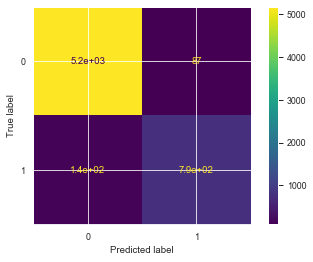



Fitting model: Logistic Regression
                 Logistic Regression
Accuracy Score              0.959935
Precision Score             0.875551
Recall Score                0.854839
F1 Score                    0.865071
Auc Score                   0.916678
Plotting the Confusion Matrix...


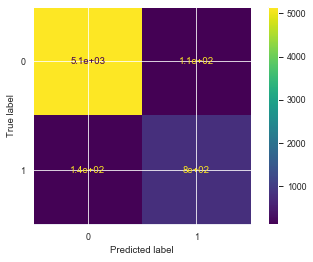



Fitting model: RBF SVM
                  RBF SVM
Accuracy Score   0.964943
Precision Score  0.904654
Recall Score     0.856989
F1 Score         0.880177
Auc Score        0.920510
Plotting the Confusion Matrix...


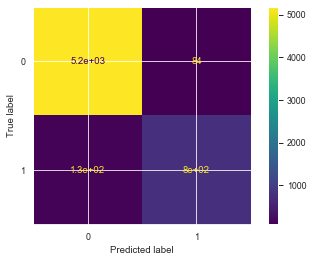



Fitting model: Random Forest
                 Random Forest
Accuracy Score        0.962197
Precision Score       0.881579
Recall Score          0.864516
F1 Score              0.872964
Auc Score             0.921992
Plotting the Confusion Matrix...


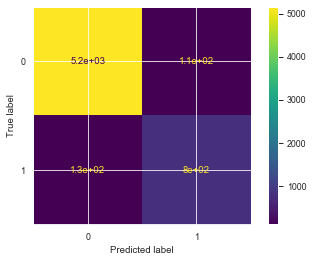



Fitting model: Neural Net


C:\Users\dogan\AppData\Local\Continuum\anaconda2\envs\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                 Neural Net
Accuracy Score     0.962843
Precision Score    0.872340
Recall Score       0.881720
F1 Score           0.877005
Auc Score          0.929453
Plotting the Confusion Matrix...


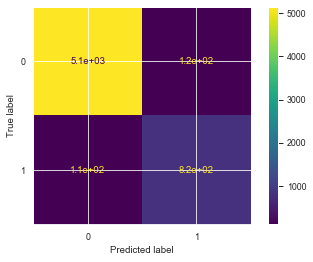



Fitting model: AdaBoost
                 AdaBoost
Accuracy Score   0.968013
Precision Score  0.903084
Recall Score     0.881720
F1 Score         0.892274
Auc Score        0.932495
Plotting the Confusion Matrix...


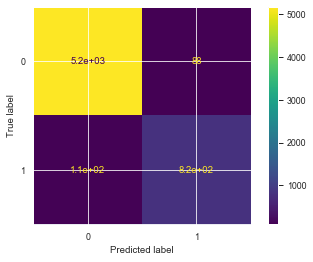



Fitting model: XGBoost Classifier
                 XGBoost Classifier
Accuracy Score             0.977221
Precision Score            0.927411
Recall Score               0.920430
F1 Score                   0.923907
Auc Score                  0.953846
Plotting the Confusion Matrix...


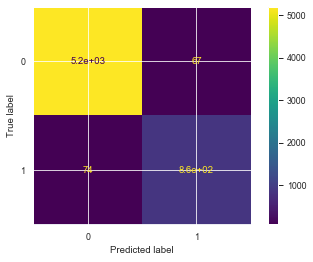

Nearest Neighbor  Logistic Regression   RBF SVM  \
Accuracy Score           0.963005             0.959935  0.964943   
Precision Score          0.900571             0.875551  0.904654   
Recall Score             0.847312             0.854839  0.856989   
F1 Score                 0.873130             0.865071  0.880177   
Auc Score                0.915386             0.916678  0.920510   

                 Random Forest  Neural Net  AdaBoost  XGBoost Classifier  
Accuracy Score        0.962197    0.962843  0.968013            0.977221  
Precision Score       0.881579    0.872340  0.903084            0.927411  
Recall Score          0.864516    0.881720  0.881720            0.920430  
F1 Score              0.872964    0.877005  0.892274            0.923907  
Auc Score             0.921992    0.929453  0.932495            0.953846

In [38]:
fit_clf_model(model2, df_clf)